<a href="https://colab.research.google.com/github/jasminerliu/SHTEM-educational-AI/blob/main/EmotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers hydra_core omegaconf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 27.8 MB/s 
     |████████████████████████████████| 151 kB 69.9 MB/s 
     |████████████████████████████████| 79 kB 10.2 MB/s 
     |████████████████████████████████| 596 kB 58.8 MB/s 
     |████████████████████████████████| 101 kB 13.0 MB/s 
     |████████████████████████████████| 6.6 MB 52.3 MB/s 
     |████████████████████████████████| 117 kB 66.5 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=3f8aef5b270a08aeb5d4b61402e583347a3dfdcc49bb660a86b147b79359c50a
  Stored in directory: /root/.cache/pip/wheels/8b/8d/53/2af8772d9aec614e3fc65e53d4a993ad73c61daa8bbd85a873
Successfully built antlr4-python3-runtime
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip3 install wordfreq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56.8 MB 1.2 MB/s 
     |████████████████████████████████| 53 kB 1.3 MB/s 


In [ ]:
import pandas as pd
import nltk
import tqdm
import re

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sem.logic import Tokens
from wordfreq import zipf_frequency

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from google.colab import files



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

#EmoRoBERTa
emotion = pipeline('sentiment-analysis', 
                    model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
name = input("Hi, my name is EducationAI Bot! What is your name?: ")
userText = input("Hi " + name + ", what can I help you with?: ")
print(emotion(userText))



Hi, my name is EducationAI Bot! What is your name?: tf
Hi tf, what can I help you with?: sdfs
[{'label': 'neutral', 'score': 0.9976309537887573}]


In [ ]:
#read in file
with open('/content/Ebooks.txt', 'r') as f: 
  #removing all the return keys and replacing with space.
    data = f.read().replace('\n', ' ')



In [ ]:
data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#THIS IS JUST A TEST
sample_text = "Down the Rabbit-Hole     Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?”   So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her."
find_spaces = re.search("[ ]{2,}", sample_text)
if find_spaces:
  print("There are multiple spaces")
  sample_text_fixed = re.sub("[ ]{2,}", " ", sample_text)
  print(sample_text_fixed)
else:
  print("All single spaces")

In [ ]:
data_fixed = re.sub("[ ]{2,}", " ", data)
print(data_fixed)

﻿CHAPTER I. Down the Rabbit-Hole Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?” So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her. There was nothing so _very_ remarkable in that; nor did Alice think it so _very_ much out of the way to hear the Rabbit say to itself, “Oh dear! Oh dear! I shall be late!” (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually _took a watch out of its wais

In [ ]:
from numpy import true_divide
#Getting bigrams
from nltk.corpus import stopwords

bigram_out = []

no_punct_data = re.sub(r'[^\w\s]', '', data_fixed)
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(no_punct_data)
filtered_data = [w for w in word_tokens if not w.lower() in stop_words]
filtered_data = []
  
for w in word_tokens:
    if w not in stop_words:
        filtered_data.append(w)

#print(filtered_data)

filtered_data_txt = " ".join(filtered_data)

bigrm = list(nltk.bigrams(filtered_data_txt.split()))
frequency = nltk.FreqDist(bigrm)

#print(*map(' '.join, bigrm), sep=', ')
sorted_bigrams = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True)[0:20])


for key,value in sorted_bigrams.items():
    #print(key,value)
    '''
    bigram_output_features = []
    bigram_output_features['frequency'] = value
    bigram_output_features['bigram'] = key
    bigram_out.append(bigram_output_features)
df_bigram = pd.DataFrame(bigram_out)
'''


NameError: ignored

In [ ]:
df_bigram

NameError: ignored

In [ ]:
token_sentences = sent_tokenize(data_fixed)

count = 0
out = []
for sentence in tqdm.tqdm(token_sentences):
  dict_emotion = emotion(sentence)[0]
  dict_emotion['count'] = count
  dict_emotion['sentence'] = sentence
  dict_emotion['sentence_length_str'] = len(sentence)
  dict_emotion['sentence_length_word'] = len(word_tokenize(sentence))
  dict_emotion['sentence_complexity'] = zipf_frequency(sentence, 'en')
  out.append(dict_emotion)
  count += 1
  #if count >= 10:
    #break

df_emotions = pd.DataFrame(out)
df_emotions.to_csv('output_test1.csv')

100%|██████████| 3774/3774 [28:09<00:00,  2.23it/s]


In [ ]:
df_emotions

,label,score,count,sentence,sentence_length_str,sentence_length_word,sentence_complexity
0,neutral,0.953611,0,﻿CHAPTER I.,11,3,4.65
1,neutral,0.911525,1,Down the Rabbit-Hole Alice was beginning to ge...,613,131,2.20
2,surprise,0.945914,2,There was nothing so _very_ remarkable in that...,144,33,0.00
3,love,0.942170,3,Oh dear!,8,3,4.68
4,curiosity,0.596330,4,I shall be late!” (when she thought it over af...,585,126,0.00
5,neutral,0.681626,5,"In another moment down went Alice after it, ne...",109,23,4.00
6,realization,0.843396,6,The rabbit-hole went straight on like a tunnel...,219,42,3.16
7,neutral,0.506768,7,"Either the well was very deep, or she fell ver...",162,37,3.98
8,realization,0.994401,8,"First, she tried to look down and make out wha...",269,58,2.57
9,disappointment,0.688773,9,She took down a jar from one of the shelves as...,282,62,2.45


In [ ]:
df_emotions.to_csv('output_test1.csv')

NameError: ignored

In [ ]:
df_emotions=pd.read_csv('emotion_output_STHEM.csv')
df_emotions = df_emotions.apply(lambda row: row[df_emotions['label'].isin(['love','disappointment','anger','gratitude'])])

df_emotions = df_emotions.drop(['score', 'count', 'sentence','Unnamed: 0'], axis=1)
df_emotions



,label,sentence_length_str,sentence_length_word,sentence_complexity
3,love,8,3,4.68
9,disappointment,282,62,2.45
29,love,14,4,3.12
104,love,228,64,0.00
153,gratitude,114,33,1.91
...,...,...,...,...
3604,disappointment,133,30,3.51
3630,gratitude,390,104,2.24
3737,disappointment,109,25,3.26
3754,anger,102,22,2.36


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


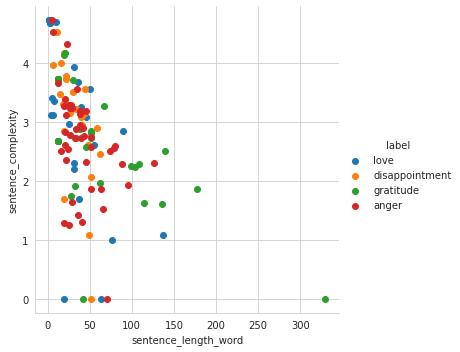

In [ ]:
sns.set_style('whitegrid');
sns.FacetGrid(df_emotions, hue='label', size=5).map(plt.scatter, 'sentence_length_word', 'sentence_complexity').add_legend();
plt.show()

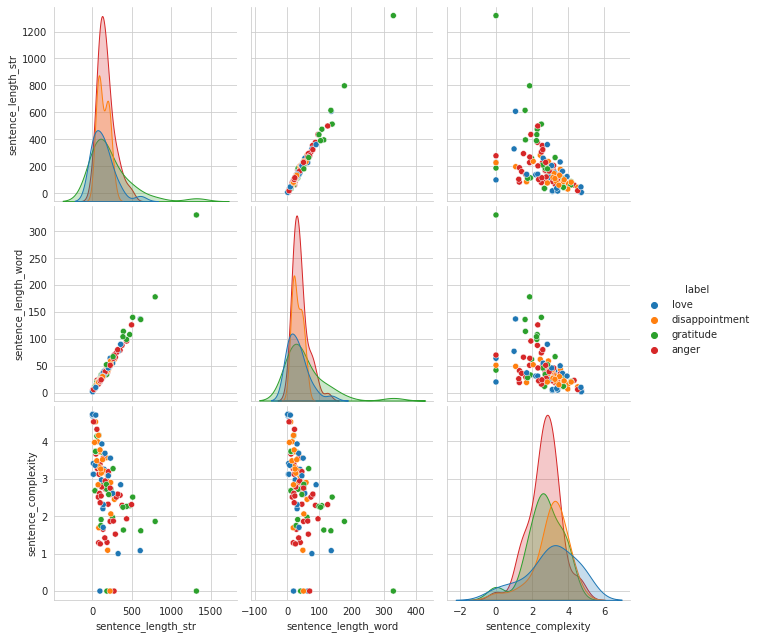

In [ ]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df_emotions, hue='label', height=3)
plt.show()

In [ ]:
!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.anaconda.org/scipy-wheels-nightly/simple


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with

X = df_emotions.data[:, :2]  # we only take the first two features.
Y = df_emotions.label

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()


In [ ]:
import scipy as scp
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix


import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
X = df_emotions[['sentence_length_word', 'sentence_complexity']]  # we only take the first two features.
Y = df_emotions.label

model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X, Y)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': 0,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

logit_model=sm.MNLogit(Y,sm.add_constant(X))
logit_model
result=logit_model.fit()
stats1=result.summary()
#stats2=result.summary2()
print(stats1)
#print(stats2)

Optimization terminated successfully.
         Current function value: 1.315949
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                  label   No. Observations:                  130
Model:                        MNLogit   Df Residuals:                      121
Method:                           MLE   Df Model:                            6
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                 0.02852
Time:                        20:48:13   Log-Likelihood:                -171.07
converged:                       True   LL-Null:                       -176.09
Covariance Type:            nonrobust   LLR p-value:                    0.1229
label=disappointment       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0766      1.087     -0.991      0.322      -3.206       1.053

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
df_emotions

,label,sentence_length_str,sentence_length_word,sentence_complexity
3,love,8,3,4.68
9,disappointment,282,62,2.45
29,love,14,4,3.12
104,love,228,64,0.00
153,gratitude,114,33,1.91
...,...,...,...,...
3604,disappointment,133,30,3.51
3630,gratitude,390,104,2.24
3737,disappointment,109,25,3.26
3754,anger,102,22,2.36
